# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
## 2. Load data

In [72]:
df = pd.read_csv('E:/Powerco-BCG/clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [73]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [74]:
price_df = pd.read_csv('E:/Powerco-BCG/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [75]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [76]:
final_df = pd.merge(df, diff, on="id", how='left')

Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

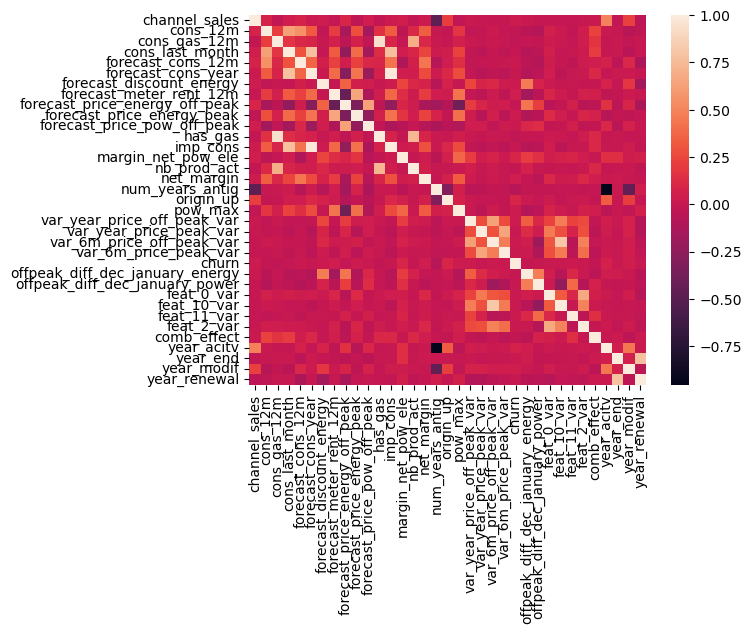

In [105]:
corr_matrix = final_df.corr()
import seaborn as sns
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            annot_kws={'size': 12})
plt.show()

0.9999141087859968


<Axes: xlabel='margin_gross_pow_ele', ylabel='margin_net_pow_ele'>

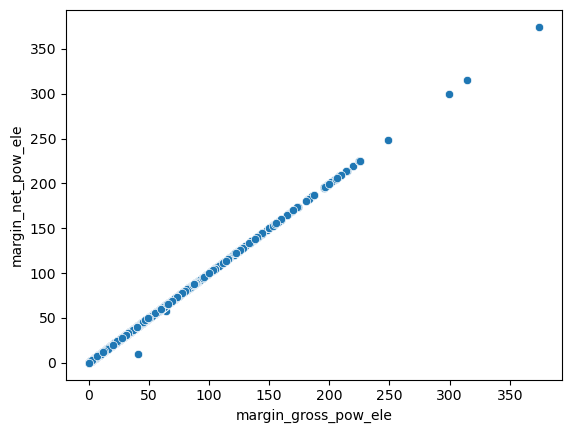

In [78]:
#Complete correlation so no additional information present
print(corr_matrix.loc['margin_gross_pow_ele','margin_net_pow_ele'])
sns.scatterplot(data=final_df, x='margin_gross_pow_ele',y='margin_net_pow_ele')

<Axes: >

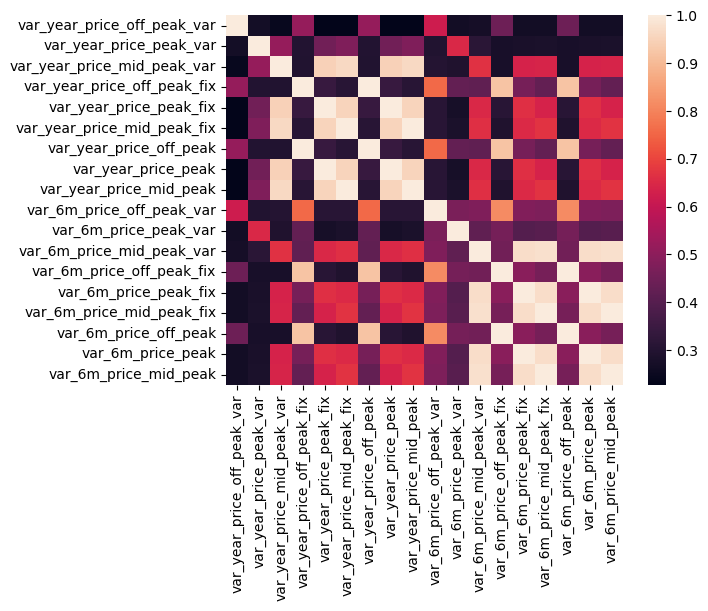

In [79]:
sns.heatmap(corr_matrix.iloc[17:35,17:35])

In [80]:
corr_matrix.iloc[17:35,17:35]>0.9

,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak
var_year_price_off_peak_var,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
var_year_price_peak_var,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
var_year_price_mid_peak_var,False,False,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False
var_year_price_off_peak_fix,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False
var_year_price_peak_fix,False,False,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False
var_year_price_mid_peak_fix,False,False,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False
var_year_price_off_peak,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False
var_year_price_peak,False,False,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False
var_year_price_mid_peak,False,False,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False
var_6m_price_off_peak_var,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(final_df[["var_year_price_mid_peak_var", "var_year_price_peak_fix","var_year_price_mid_peak_fix","var_year_price_peak","var_year_price_mid_peak"]])
final_df['feat_0_var'] =pd.DataFrame(pca.transform(final_df[["var_year_price_mid_peak_var", "var_year_price_peak_fix","var_year_price_mid_peak_fix","var_year_price_peak","var_year_price_mid_peak"]]).reshape(1,-1)[0])

In [82]:
pca = PCA(n_components=2)
pca.fit(final_df[["var_year_price_off_peak_fix", "var_year_price_off_peak","var_6m_price_off_peak_fix","var_6m_price_off_peak"]])
temp = pd.DataFrame(pca.transform(final_df[["var_year_price_off_peak_fix", "var_year_price_off_peak","var_6m_price_off_peak_fix","var_6m_price_off_peak"]]), columns=['feat_1','feat_2'])
final_df['feat_10_var']=temp['feat_1']
final_df['feat_11_var']=temp['feat_2']

In [83]:
pca = PCA(n_components=1)
pca.fit(final_df[["var_6m_price_mid_peak_var", "var_6m_price_peak_fix","var_6m_price_mid_peak_fix","var_6m_price_peak","var_6m_price_mid_peak"]])
temp = pd.DataFrame(pca.transform(final_df[["var_6m_price_mid_peak_var", "var_6m_price_peak_fix","var_6m_price_mid_peak_fix","var_6m_price_peak","var_6m_price_mid_peak"]]), columns=['feat_1'])
final_df['feat_2_var']=temp['feat_1']

In [84]:
from scipy.stats import f_oneway
def anova_test(data, col1, col2):
    l=[]
    for i in data[col1].unique():
        l.append(np.array(data[data[col1]==i][col2]))
    sample1 , sample2 = l
    f_stat, pvalue = f_oneway(sample1, sample2)
    print(col2,end=" ")
    print(f"P-value: {pvalue}")

anova_test(final_df,'churn','offpeak_diff_dec_january_power')
anova_test(final_df,'churn','offpeak_diff_dec_january_energy')

offpeak_diff_dec_january_power P-value: 0.7468153154741417
offpeak_diff_dec_january_energy P-value: 0.8976494793800017


In [85]:
final_df['comb_effect'] = ((final_df.cons_12m/12 - final_df.cons_last_month) * final_df.offpeak_diff_dec_january_energy)

In [86]:
from scipy.stats import f_oneway
def anova_test(data, col1, col2):
    l=[]
    for i in data[col1].unique():
        l.append(np.array(data[data[col1]==i][col2]))
    sample1 , sample2 = l
    f_stat, pvalue = f_oneway(sample1, sample2)
    print(col2,end=" ")
    print(f"P-value: {pvalue}")

anova_test(final_df,'churn','comb_effect')

comb_effect P-value: 0.017119235142827725


In [87]:
from scipy import stats
final_df['year_acitv'] = final_df.date_activ.dt.year
final_df['year_end'] = final_df.date_end.dt.year
final_df['year_modif'] = final_df.date_modif_prod.dt.year
final_df['year_renewal'] = final_df.date_renewal.dt.year

def chi_test(data, col1, col2):
    # Create a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(col2,end=" ")
    print(f"P-value: {p}")
chi_test(final_df, 'year_renewal','churn')

churn P-value: 0.7139291206400709


In [88]:
#Drop columns decision

#list maintenance
columns_to_drop = ['id','margin_gross_pow_ele',"var_year_price_off_peak_fix", "var_year_price_off_peak","var_6m_price_off_peak_fix","var_6m_price_off_peak","var_year_price_mid_peak_var", "var_year_price_peak_fix","var_year_price_mid_peak_fix","var_year_price_peak","var_year_price_mid_peak"
                   ,"var_6m_price_mid_peak_var", "var_6m_price_peak_fix","var_6m_price_mid_peak_fix","var_6m_price_peak","var_6m_price_mid_peak","date_activ","date_end","date_modif_prod","date_renewal",'forecast_cons_year']
final_df = final_df.drop(columns=columns_to_drop)

In [89]:
final_df.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [90]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
final_df['channel_sales'] = label_encoder.fit_transform(final_df['channel_sales'])
final_df['channel_sales'].unique()

array([4, 0, 5, 7, 2, 1, 6, 3])

In [91]:
final_df['origin_up'] = label_encoder.fit_transform(final_df['origin_up'])
final_df['origin_up'].unique()

array([4, 2, 3, 0, 5, 1])

In [94]:
final_df['has_gas']=final_df.has_gas.apply(lambda x: 1 if x=='t' else 0)

In [97]:
# Apply log10 transformation
final_df["cons_12m"] = np.log10(final_df["cons_12m"] + 1)
final_df["cons_gas_12m"] = np.log10(final_df["cons_gas_12m"] + 1)
final_df["cons_last_month"] = np.log10(final_df["cons_last_month"] + 1)
final_df["forecast_cons_12m"] = np.log10(final_df["forecast_cons_12m"] + 1)
final_df["forecast_cons_year"] = np.log10(final_df["forecast_cons_year"] + 1)
final_df["forecast_meter_rent_12m"] = np.log10(final_df["forecast_meter_rent_12m"] + 1)
final_df["imp_cons"] = np.log10(final_df["imp_cons"] + 1)

In [98]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   channel_sales                    14606 non-null  int32  
 1   cons_12m                         14606 non-null  float64
 2   cons_gas_12m                     14606 non-null  float64
 3   cons_last_month                  14606 non-null  float64
 4   forecast_cons_12m                14606 non-null  float64
 5   forecast_cons_year               14606 non-null  float64
 6   forecast_discount_energy         14606 non-null  float64
 7   forecast_meter_rent_12m          14606 non-null  float64
 8   forecast_price_energy_off_peak   14606 non-null  float64
 9   forecast_price_energy_peak       14606 non-null  float64
 10  forecast_price_pow_off_peak      14606 non-null  float64
 11  has_gas                          14606 non-null  int64  
 12  imp_cons          

In [99]:
final_df.to_csv('E:/Powerco-BCG/engineered_data.csv')